In [94]:
### Dependencies and Setup
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
import json
import pprint as pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = 'output_data/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [108]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=10)
lngs = np.random.uniform(low=-180.000, high=180.000, size=10)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country.upper())

# Print the city count to confirm sufficient count
print(cities)
#print(len(countries))

['iqaluit', 'hobart', 'maxixe', 'yellowknife', 'oxford', 'rikitea', 'atar', 'vaini', 'vavoua', 'oksfjord']


In [117]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'

query_url = f'{url}appid={weather_api_key}&units={units}&q='
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=903e1bd03f40d13df33db6e3b9f935c1&units=imperial&q='

In [118]:
lat = []
temp = []
humidity = []
cloudiness = []
wind_speed = []

for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])
    humidity.append(response['main']['humidity'])
    cloudiness.append(response['clouds']['all'])
    wind_speed.append(response['wind']['speed'])
       
print(f'Lat is {lat}')
print(f'Temp is {temp}')
print(f'Humidity is {humidity}')
print(f'Cloudiness is {cloudiness}')
print(f'Wind speed is {wind_speed}')

Lat is [63.75, -42.88, -23.86, 62.46, 51.75, -23.12, 20.52, -21.2, 7.38, 70.24]
Temp is [-23.42, 54.93, 77, -5.42, 41.29, 77.59, 79.36, 69.8, 90.91, 32.13]
Humidity is [67, 71, 69, 76, 81, 78, 10, 100, 39, 59]
Cloudiness is [20, 90, 75, 75, 8, 26, 17, 20, 73, 75]
Wind speed is [12.75, 2.24, 9.17, 4.7, 4.7, 10.87, 9.51, 9.78, 3.4, 31.09]


In [123]:
#create dataframe
weather_dict = {
    'city': cities,
    'lat': lat,
    'temp': temp,
    'humidity': humidity,
    'clouds': cloudiness,
    'wind_speed': wind_speed
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,city,lat,temp,humidity,clouds,wind_speed
0,iqaluit,63.75,-23.42,67,20,12.75
1,hobart,-42.88,54.93,71,90,2.24
2,maxixe,-23.86,77.00,69,75,9.17
3,yellowknife,62.46,-5.42,76,75,4.70
4,oxford,51.75,41.29,81,8,4.70
5,rikitea,-23.12,77.59,78,26,10.87
6,atar,20.52,79.36,10,17,9.51
7,vaini,-21.20,69.80,100,20,9.78
8,vavoua,7.38,90.91,39,73,3.40
9,oksfjord,70.24,32.13,59,75,31.09


In [124]:
lat_values = weather_data['lat']
temp_values = weather_data['temp']
humidity_values = weather_data['humidity']
clouds_values = weather_data['clouds']
wind_speed_values = weather_data['wind_speed']

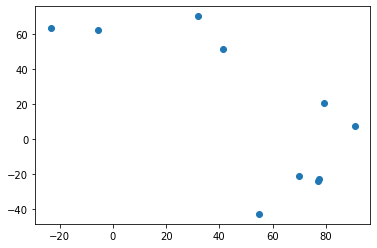

In [131]:
plt.scatter(temp_values, lat_values)

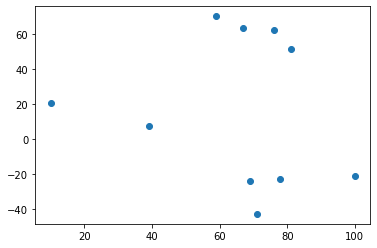

In [128]:
plt.scatter(humidity_values, lat_values)

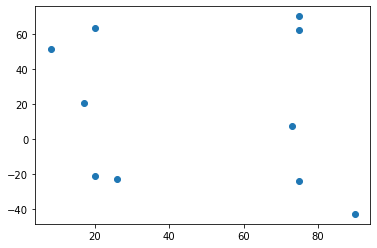

In [129]:
plt.scatter(clouds_values, lat_values)

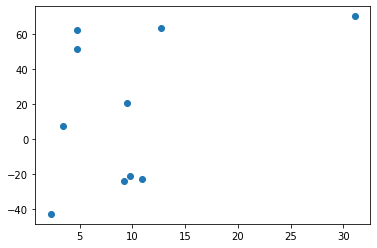

In [130]:
plt.scatter(wind_speed_values, lat_values)

In [143]:
northern_hem = weather_data['lat'] >= 0
northern_hem

0     True
1    False
2    False
3     True
4     True
5    False
6     True
7    False
8     True
9     True
Name: lat, dtype: bool

In [144]:
southern_hem = weather_data['lat'] < 0
southern_hem

0    False
1     True
2     True
3    False
4    False
5     True
6    False
7     True
8    False
9    False
Name: lat, dtype: bool